# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data (Elissa's contribution)
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

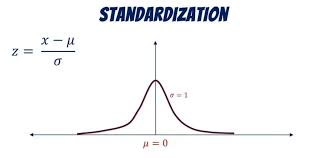


In [ ]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

standardized_data = None
standardized_data[:5]

In [ ]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np

filename = 'agriculture.csv'

# Load the data with pandas (handles mixed data types)
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nColumn names:")
print(df.columns.tolist())

# Select only numerical columns for PCA
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumerical columns ({len(numerical_cols)}):")
print(numerical_cols.tolist())

# Extract numerical data only
numerical_data = df[numerical_cols].values

# Handle missing values (replace NaN with column mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_data = imputer.fit_transform(numerical_data)

# Standardize the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

print(f"\nStandardized data shape: {standardized_data.shape}")
print("First 5 rows of standardized data:")
print(standardized_data[:5])




### Step 3: Calculate the Covariance Matrix(Aubert's contribution)
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = None  # Calculate covariance matrix
cov_matrix

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # rowvar=False means each column is a variable
print("Covariance matrix shape:", cov_matrix.shape)
print("\nCovariance matrix:")
print(cov_matrix)


Covariance matrix shape: (1536, 1536)

Covariance matrix:
[[ 1.00010421e+00  9.89593165e-01  1.66763574e-01 ... -7.01112744e-02
  -8.61736186e-03  2.19995740e-02]
 [ 9.89593165e-01  1.00010421e+00  1.73899507e-01 ... -6.51402102e-02
  -1.22086840e-02  2.25316564e-02]
 [ 1.66763574e-01  1.73899507e-01  1.00010421e+00 ...  8.32685004e-04
  -3.25156652e-03  2.56518514e-02]
 ...
 [-7.01112744e-02 -6.51402102e-02  8.32685004e-04 ...  1.00010421e+00
   9.60213917e-01  9.03696559e-01]
 [-8.61736186e-03 -1.22086840e-02 -3.25156652e-03 ...  9.60213917e-01
   1.00010421e+00  9.21100536e-01]
 [ 2.19995740e-02  2.25316564e-02  2.56518514e-02 ...  9.03696559e-01
   9.21100536e-01  1.00010421e+00]]


### Step 4: Perform Eigendecomposition(Aubert's contribution)
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = None  # Perform eigendecomposition
eigenvalues, eigenvectors

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)

print("\nEigenvalues (first 10):")
print(eigenvalues[:10])

print("\nEigenvectors (first 5x5 portion):")
print(eigenvectors[:5, :5])

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]  # Sort indices in descending order
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nSorted eigenvalues (first 10):")
print(eigenvalues[:10])

print("\nSum of eigenvalues:", np.sum(eigenvalues))
print("Number of features:", len(eigenvalues))


NameError: name 'np' is not defined

### Step 5: Sort Principal Components(Caline's contribution)
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly
sorted_eigenvectors

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]  # Sort eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly

print("Sorted indices:", sorted_indices[:10])
print("\nSorted eigenvalues (first 10):")
print(sorted_eigenvalues[:10])

print("\nSorted eigenvectors shape:", sorted_eigenvectors.shape)
print("\nFirst principal component (eigenvector):")
print(sorted_eigenvectors[:, 0])

print("\nVariance explained by first 5 components:")
total_variance = np.sum(sorted_eigenvalues)
for i in range(5):
    variance_explained = sorted_eigenvalues[i] / total_variance * 100
    print(f"PC{i+1}: {variance_explained:.2f}%")

sorted_eigenvectors


Sorted indices: [0 1 2 3 4 5 6 7 8 9]

Sorted eigenvalues (first 10):
[44.93283384+0.j 41.52957481+0.j 32.81701535+0.j 26.3746294 +0.j
 19.70803125+0.j 18.32331302+0.j 16.73114631+0.j 14.90231059+0.j
 14.17971845+0.j 13.4848711 +0.j]

Sorted eigenvectors shape: (1536, 1536)

First principal component (eigenvector):
[ 0.00326524+0.j  0.00350425+0.j -0.0002072 +0.j ... -0.13707443+0.j
 -0.13872924+0.j -0.13159166+0.j]

Variance explained by first 5 components:
PC1: 3.11-0.00j%
PC2: 2.87-0.00j%
PC3: 2.27-0.00j%
PC4: 1.83-0.00j%
PC5: 1.36-0.00j%


array([[ 3.26523718e-03+0.j,  6.08224482e-02+0.j,  1.43748313e-03+0.j,
        ...,  1.06565631e-11+0.j,  4.27129365e-12+0.j,
         1.53032316e-12+0.j],
       [ 3.50424814e-03+0.j,  5.92223703e-02+0.j,  1.26734220e-03+0.j,
        ..., -1.01442961e-09+0.j, -4.26070813e-10+0.j,
         9.92366076e-11+0.j],
       [-2.07195989e-04+0.j,  2.43747581e-03+0.j,  5.89486831e-03+0.j,
        ...,  3.06775344e-15+0.j,  7.89459886e-15+0.j,
         1.24083571e-16+0.j],
       ...,
       [-1.37074430e-01+0.j, -1.11683409e-02+0.j,  1.59289482e-02+0.j,
        ...,  2.46668287e-12+0.j,  1.13152830e-12+0.j,
         3.89309846e-13+0.j],
       [-1.38729235e-01+0.j,  1.51601476e-03+0.j, -2.49834291e-03+0.j,
        ..., -1.13714353e-13+0.j, -1.24387726e-13+0.j,
        -3.72353423e-14+0.j],
       [-1.31591659e-01+0.j,  9.49468261e-03+0.j,  2.61383402e-03+0.j,
        ..., -5.48992988e-13+0.j, -1.77563423e-13+0.j,
        -1.02817822e-13+0.j]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

In [ ]:
# Step 6: Project Data onto Principal Components

# First, let's see the cumulative variance to decide how many components to keep
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
print("Cumulative variance explained:")
for i in range(min(10, len(cumulative_variance))):
    print(f"First {i+1} components: {cumulative_variance[i]:.4f} ({cumulative_variance[i]*100:.2f}%)")

# Decide on number of components (e.g., to retain 90% or 95% of variance)
num_components = np.argmax(cumulative_variance >= 0.90) + 1  # For 90% variance
# Or you can manually set: num_components = 5  # Keep first 5 components

print(f"\nNumber of components to keep (90% variance): {num_components}")

# Select the first 'num_components' eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
print(f"Selected eigenvectors shape: {selected_eigenvectors.shape}")

# Project data onto the principal components
reduced_data = standardized_data @ selected_eigenvectors

print(f"\nOriginal data shape: {standardized_data.shape}")
print(f"Reduced data shape: {reduced_data.shape}")
print(f"Dimensionality reduction: {standardized_data.shape[1]} → {reduced_data.shape[1]} features")

print("\nFirst 5 rows of reduced data:")
print(reduced_data[:5])

reduced_data[:5]


Cumulative variance explained:
First 1 components: 0.0311-0.0000j (3.11-0.00j%)
First 2 components: 0.0598-0.0000j (5.98-0.00j%)
First 3 components: 0.0825-0.0000j (8.25-0.00j%)
First 4 components: 0.1008-0.0000j (10.08-0.00j%)
First 5 components: 0.1144-0.0000j (11.44-0.00j%)
First 6 components: 0.1271-0.0000j (12.71-0.00j%)
First 7 components: 0.1387-0.0000j (13.87-0.00j%)
First 8 components: 0.1490-0.0000j (14.90-0.00j%)
First 9 components: 0.1588-0.0000j (15.88-0.00j%)
First 10 components: 0.1681-0.0000j (16.81-0.00j%)

Number of components to keep (90% variance): 603
Selected eigenvectors shape: (1536, 603)

Original data shape: (9597, 1536)
Reduced data shape: (9597, 603)
Dimensionality reduction: 1536 → 603 features

First 5 rows of reduced data:
[[ -0.02036709+0.j   8.61932871+0.j  -9.47910518+0.j ...   0.10818288+0.j
    0.56189783+0.j  -1.29274274+0.j]
 [  0.15607216+0.j  10.41950715+0.j -10.80258306+0.j ...   0.61746387+0.j
   -0.55913817+0.j   1.15378081+0.j]
 [ -0.07307619

array([[ -0.02036709+0.j,   8.61932871+0.j,  -9.47910518+0.j, ...,
          0.10818288+0.j,   0.56189783+0.j,  -1.29274274+0.j],
       [  0.15607216+0.j,  10.41950715+0.j, -10.80258306+0.j, ...,
          0.61746387+0.j,  -0.55913817+0.j,   1.15378081+0.j],
       [ -0.07307619+0.j,   2.25017127+0.j,  -3.79480133+0.j, ...,
         -0.33652065+0.j,  -0.5939321 +0.j,   0.28825099+0.j],
       [ -0.11377566+0.j,   2.86054737+0.j,  -3.42817224+0.j, ...,
          0.66624832+0.j,  -1.47961155+0.j,  -0.428064  +0.j],
       [  0.13145474+0.j,   7.80829655+0.j,  -9.22781844+0.j, ...,
          0.80938465+0.j,  -0.7321111 +0.j,   1.50420791+0.j]])

### Step 7: Output the Reduced Data(Caline's contribution)
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape

print(f'\nOriginal data had {standardized_data.shape[1]} features')
print(f'Reduced data has {reduced_data.shape[1]} principal components')
print(f'Dimensionality reduction: {standardized_data.shape[1] - reduced_data.shape[1]} features removed')

print(f'\nVariance retained: {cumulative_variance[num_components-1]*100:.2f}%')

print('\nFirst 5 rows of reduced data:')
reduced_data[:5]  # Display the first few rows of reduced data


Reduced Data Shape: (9597, 603)

Original data had 1536 features
Reduced data has 603 principal components
Dimensionality reduction: 933 features removed

Variance retained: 90.02-0.00j%

First 5 rows of reduced data:


array([[ -0.02036709+0.j,   8.61932871+0.j,  -9.47910518+0.j, ...,
          0.10818288+0.j,   0.56189783+0.j,  -1.29274274+0.j],
       [  0.15607216+0.j,  10.41950715+0.j, -10.80258306+0.j, ...,
          0.61746387+0.j,  -0.55913817+0.j,   1.15378081+0.j],
       [ -0.07307619+0.j,   2.25017127+0.j,  -3.79480133+0.j, ...,
         -0.33652065+0.j,  -0.5939321 +0.j,   0.28825099+0.j],
       [ -0.11377566+0.j,   2.86054737+0.j,  -3.42817224+0.j, ...,
          0.66624832+0.j,  -1.47961155+0.j,  -0.428064  +0.j],
       [  0.13145474+0.j,   7.80829655+0.j,  -9.22781844+0.j, ...,
          0.80938465+0.j,  -0.7321111 +0.j,   1.50420791+0.j]])

### Step 8: Visualize Before and After PCA(Liliane's contribution)
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


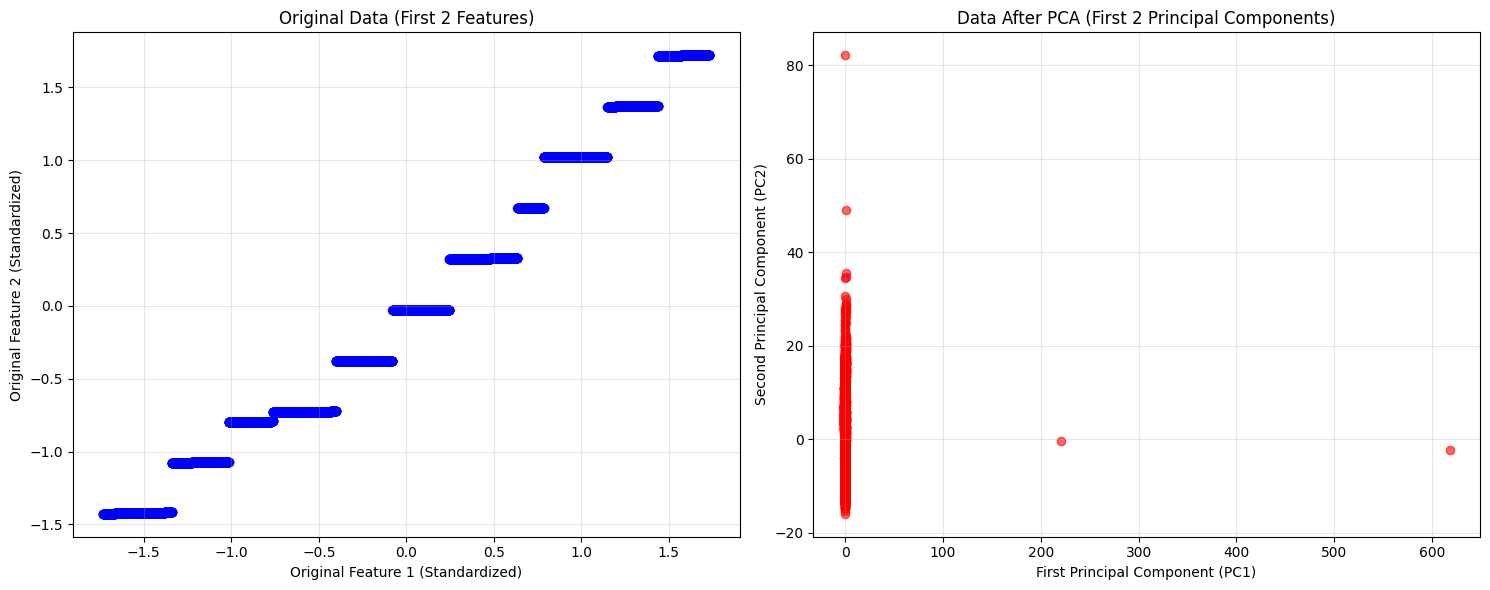

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 8: Visualize Before and After PCA

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot original data (first two features for simplicity)
ax1.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.6, c='blue')
ax1.set_xlabel('Original Feature 1 (Standardized)')
ax1.set_ylabel('Original Feature 2 (Standardized)')
ax1.set_title('Original Data (First 2 Features)')
ax1.grid(True, alpha=0.3)

# Plot reduced data after PCA (first two principal components)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, c='red')
ax2.set_xlabel('First Principal Component (PC1)')
ax2.set_ylabel('Second Principal Component (PC2)')
ax2.set_title('Data After PCA (First 2 Principal Components)')
ax2.grid(True, alpha=0.3)

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
# Step 9: Dynamically choose number of components to keep at least 95% variance
total_variance = np.sum(sorted_eigenvalues)

# Explained variance ratio of each PC
explained_variance_ratio = sorted_eigenvalues / total_variance

# Cumulative sum of explained variances
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find how many components explain at least 95%
threshold = 0.95
num_components_dynamic = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to retain 95% variance: {num_components_dynamic}")



Number of components to retain 95% variance: 758


In [ ]:
# Reduce data using dynamically selected components
selected_eigenvectors = sorted_eigenvectors[:, :num_components_dynamic]
reduced_data_dynamic = np.dot(standardized_data, selected_eigenvectors)


In [ ]:
# Optional performance-optimized PCA using SVD
U, S, Vt = np.linalg.svd(standardized_data, full_matrices=False)

# Compute explained variance from singular values
explained_variance_svd = (S ** 2) / (standardized_data.shape[0] - 1)
explained_variance_ratio_svd = explained_variance_svd / np.sum(explained_variance_svd)

# Cumulative variance
cumulative_variance_svd = np.cumsum(explained_variance_ratio_svd)

# Find number of components needed
num_components_svd = np.argmax(cumulative_variance_svd >= threshold) + 1

# Project data using only needed components
reduced_data_svd = np.dot(U[:, :num_components_svd], np.diag(S[:num_components_svd]))

print(f"SVD PCA: {num_components_svd} components kept to retain {threshold*100:.0f}% variance.")


In [ ]:
import numpy as np

# Assume standardized_data is your standardized input matrix (n_samples x n_features)

# Step 1: Perform SVD directly on standardized data
U, S, Vt = np.linalg.svd(standardized_data, full_matrices=False)

# Step 2: Calculate explained variance from singular values
explained_variance = (S ** 2) / (standardized_data.shape[0] - 1)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Step 3: Dynamically select number of components to keep 95% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_dynamic = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to retain 95% variance: {num_components_dynamic}")

# Step 4: Select top components (principal directions)
selected_components = Vt[:num_components_dynamic, :]

# Step 5: Project original data onto these components
reduced_data_dynamic = np.dot(standardized_data, selected_components.T)

print(f"Reduced data shape: {reduced_data_dynamic.shape}")


Number of components to retain 95% variance: 758
Reduced data shape: (9597, 758)
